# Dataset Student Performance
- Describes the performance of students in two secondary schools in Portugal.
- A link to the dataset is available [here](https://archive.ics.uci.edu/dataset/320/student+performance).
- It contains a total of 649 students, each described by 33 attributes.
    - Information of the attributes are avaiable in the cell below.
- It also includes attributes G1, G2 and G3 describing grades in the subject Portuguese. Attributes G1 and G2 are the grades from the first and second semester, while G3 is the grade from the whole year.

## Paper
- Name: USING DATA MINING TO PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE
- [Original paper](https://www.semanticscholar.org/paper/Using-data-mining-to-predict-secondary-school-Cortez-Silva/61d468d5254730bbecf822c6b60d7d6595d9889c) (2008) compared multiple data mining methods on this data.
    - The methods used included Decision Trees, Random Forests, Support Vector Machines and Neural Networks.
    - Note that the paper found that it is easy to derive G3 (final grade) based on G1 and G2 grades. I will focus primarly on G3 grade.

In [1]:
# Attributes description
%cat student_performance/student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

-----

In [2]:
SCIPY_ARRAY_API = 1 # Enable SciPy array API for compatibility

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.options.mode.copy_on_write = True

# Set color palette for good accessibility
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")
palette 

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
# Load the dataset
# Note that I am using only the Portuguese part of the dataset, because the Mathematics part contains only 396 entries.
data_students = pd.read_csv("student_performance/student-por.csv", sep=";")
data_students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


-----
# Data Understanding

In [4]:
# Display basic information about the dataset
data_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# Double-check the missing values
data_students.isnull().sum().to_frame(name="missing_values").T

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
missing_values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Drop duplicates
data_students.drop_duplicates(inplace=True)

In [7]:
# Describe 
data_students.select_dtypes(include="int").describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
# Number of unique values for each attribute
data_students.nunique().to_frame(name="unique_values").T

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
unique_values,2,2,8,2,2,2,5,5,5,5,...,5,5,5,5,5,5,24,17,16,17


In [9]:
# Print the value counts for each column to understand the distribution
# I added an number to each column for easier reference

many_values = ["absences", "G1", "G2", "G3"]

for i, col in enumerate(data_students.columns):
    if col not in many_values:
        print(f"[{i + 1}]", data_students[col].value_counts(), "\n")
    else:
        # For columns with many values, we will just print the first few
        print(f"[{i + 1}]", data_students[col].value_counts().sort_index(ascending=False), "\n")

[1] school
GP    423
MS    226
Name: count, dtype: int64 

[2] sex
F    383
M    266
Name: count, dtype: int64 

[3] age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64 

[4] address
U    452
R    197
Name: count, dtype: int64 

[5] famsize
GT3    457
LE3    192
Name: count, dtype: int64 

[6] Pstatus
T    569
A     80
Name: count, dtype: int64 

[7] Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64 

[8] Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64 

[9] Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64 

[10] Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64 

[11] reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64 

[12] guardian
mother    455
father    153
other      41
Name: count, dtype: int64 

In [10]:
# [3] Students older than 19 years old are not typical in this dataset (they are ~1.3% of the total).
data_students = data_students[data_students.age <= 19] 

# [7][8] Medu and Fedu (mother's and father's education) is not typical to be 0 (no education).
# In case of Medu, it is ~0.6% of the total, and in case of Fedu, it is ~0.7% of the total.

# [13] There are 16 student (~2%) who travel to school more than 60 minutes.

# [15] The number of failures is not typical to be more than 1.
# The total number of students who have failed at least once is 15.4%.
# –> We can create a new column that indicates whether the student has failed at least once.
data_students["failed"] = data_students["failures"] > 0

# [24] Famrel (family relationship) is not typical to be 0 or 1 (very bad / bad family relationship).
# In percentage of ~0.3% and ~0.4% of the total.

# [27] Dalc (daily alcohol consumption) is not typical to be more than 3 (medium daily alcohol consumption).
# In percentage of ~0.5% of the total.

# [30] In case of abscences, we can specify thresholds for outliers, but better way is to use create a new column that indicates whether the student has many absences.

# [31][32][33] In case of G1, G2, and G3 (first, second, and final grade), we can use six-point grading scale used in secondary schools in Portugal. See preprocessing chapter for more details. 

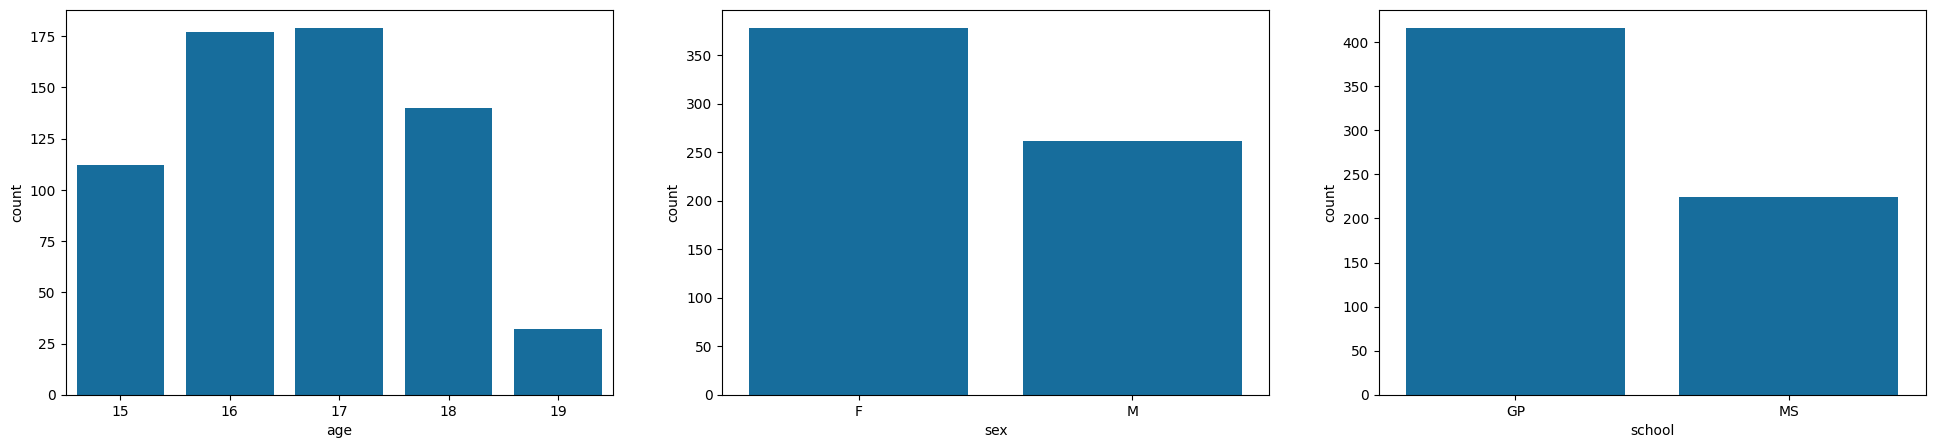

In [11]:
# Visualize the distribution of numerical features
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches((24, 5))


sns.countplot(data=data_students, x="age", ax=axes[0])
sns.countplot(data=data_students, x="sex", ax=axes[1])
sns.countplot(data=data_students, x="school", ax=axes[2])
pass

In [12]:
# Create a new column for absences
# We can use quantiles to define thresholds for absences.

# We calculate quantiles for students with absences greater than 0 and create a separate category for students with no absences.
data_students[data_students["absences"] > 0]["absences"].quantile([0.25, 0.5, 0.75])

0.25    2.0
0.50    4.0
0.75    8.0
Name: absences, dtype: float64

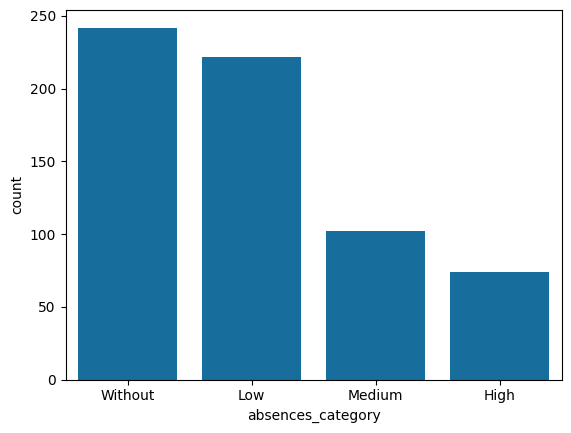

In [13]:
data_students["absences_category"] = pd.cut(data_students["absences"],
                                               bins=[0, 0.1, 4, 8, 100],
                                               include_lowest=True,
                                               labels=["Without", "Low", "Medium", "High"])

sns.countplot(data=data_students, x="absences_category")
pass

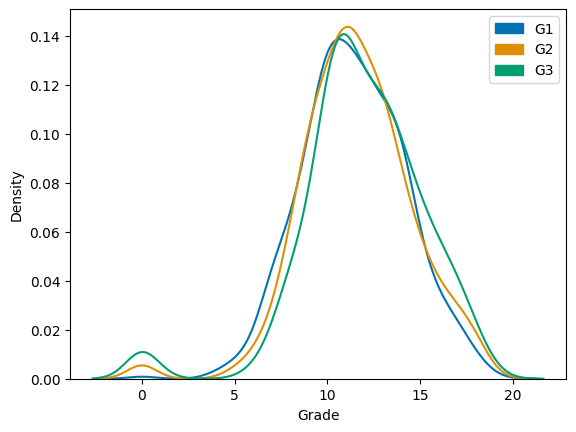

In [14]:
# Visualize the distribution of grades
fig, ax = plt.subplots()
handles = []

for c, col in zip(palette[:3], ["G1", "G2", "G3"]):
    # For each grade column, create a patch for the legend   
    handles.append(
        mpatches.Patch(color=c, label=col)
    )
    sns.kdeplot(data=data_students, x=col, color=c, label=col)

ax.legend(handles=handles)
ax.set_xlabel("Grade")
pass

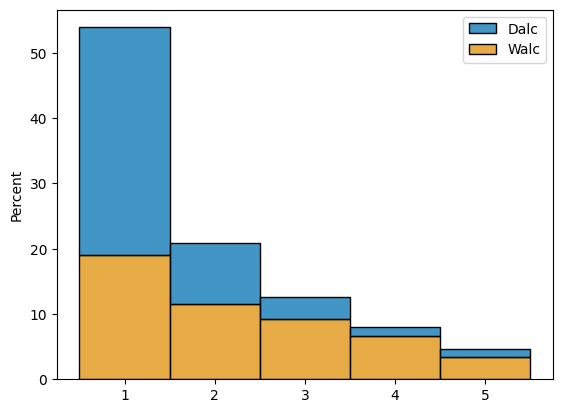

In [15]:
# Alcohol consumption
sns.histplot(data=data_students[["Dalc", "Walc"]], stat="percent", multiple="stack", discrete=True)
pass

-----

# Preprocessing the data

In [ ]:
# Change data types of columns to appropriate types

# To categorical data type
to_category = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "traveltime", "failures"]
data_students[to_category] = data_students[to_category].astype("category")

# To categorical data type with ordered categories
from_ordered = ["Medu", "Fedu", "studytime", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]
data_students[from_ordered] = data_students[from_ordered].astype("category")

for attribute in from_ordered:
    col = data_students[attribute]
    values = col.cat.categories.values
    order = sorted(values)
    data_students[attribute] = data_students[attribute].cat.reorder_categories(order, ordered=True)

# Convert numerical columns to boolean type
to_bool = ["schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
data_students[to_bool] = data_students[to_bool].astype("bool")

# Creating a word grading column for G1, G2 and G3
# Grading is based on the five-level classification system used in Paper (2008) Table 2. – Erasmus grading system
def grade(data, column):
    "Functions for converting numerical scores to verbal scores."
    return pd.cut(
        data[column],
        [0, 9, 11, 13, 15, 20 + 1],
        labels=["Fail", "Sufficient", "Satisfactory", "Good", "Very good"],
        include_lowest=True
    )

data_students["G1_grade"] = grade(data_students, "G1")
data_students["G2_grade"] = grade(data_students, "G2")
data_students["G3_grade"] = grade(data_students, "G3")

,Sufficient,Satisfactory,Fail,Good,Very good
G1_grade,28.59375,24.0625,23.75000,16.40625,7.1875
G2_grade,28.59375,25.6250,22.34375,14.06250,9.3750
G3_grade,30.78125,23.7500,15.46875,17.18750,12.8125


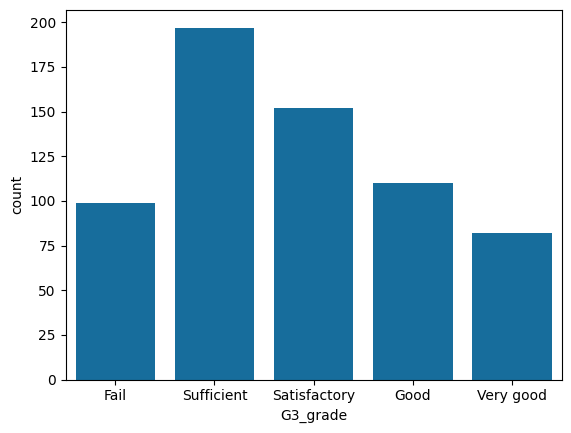

In [17]:
# Visualize the distribution of G3 grades
sns.countplot(data=data_students, x="G3_grade")

data_students.agg({
    "G1_grade": "value_counts",
    "G2_grade": "value_counts",
    "G3_grade": "value_counts"
}).T / len(data_students) * 100

# We can see students Fail only in 15% of cases, and in 85% of cases they pass the course.
# That means that uneven distribution of classes (Class Imbalance Problem)

In [18]:
data_students["G3_grade"].value_counts()

G3_grade
Sufficient      197
Satisfactory    152
Good            110
Fail             99
Very good        82
Name: count, dtype: int64

In [19]:
# Because many models do not support categorical data, we will convert categorical columns to numerical ones.
numerical_data = data_students.copy()
categorical_columns = numerical_data.select_dtypes(include="category").columns

# We can use codes that represent the categories as integers.
numerical_data[categorical_columns] = numerical_data[categorical_columns].apply(lambda x: x.cat.codes)

In [20]:
# Data check
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 0 to 648
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             640 non-null    int8 
 1   sex                640 non-null    int8 
 2   age                640 non-null    int64
 3   address            640 non-null    int8 
 4   famsize            640 non-null    int8 
 5   Pstatus            640 non-null    int8 
 6   Medu               640 non-null    int8 
 7   Fedu               640 non-null    int8 
 8   Mjob               640 non-null    int8 
 9   Fjob               640 non-null    int8 
 10  reason             640 non-null    int8 
 11  guardian           640 non-null    int8 
 12  traveltime         640 non-null    int8 
 13  studytime          640 non-null    int8 
 14  failures           640 non-null    int8 
 15  schoolsup          640 non-null    bool 
 16  famsup             640 non-null    bool 
 17  paid               64

In [21]:
numerical_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,failed,absences_category,G1_grade,G2_grade,G3_grade
0,0,0,18,1,0,0,4,4,0,4,...,2,4,0,11,11,False,1,0,1,1
1,0,0,17,1,0,1,1,1,0,2,...,2,2,9,11,11,False,1,0,1,1
2,0,0,15,1,1,1,1,1,0,2,...,2,6,12,13,12,False,2,2,2,2
3,0,0,15,1,0,1,4,2,1,3,...,4,0,14,14,14,False,0,3,3,3
4,0,0,16,1,0,1,3,3,2,2,...,4,0,11,13,13,False,0,1,2,2


In [22]:
y_attributes = ["G1", "G2", "G3", "G1_grade", "G2_grade", "G3_grade"]

-----

# Modeling
Data can be modelled in several ways. The following approaches have been used in the Paper (2008):
1. Binary classification – pass if G3 ≥ 10, else fail;
2. 5-Level classification – based on the Erasmus1 grade conversion system (Table 2);
3. Regression – the G3 value (numeric output between 0 and 20).

I will focus only on binary classification.

## Decision Tree Classification

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
def tree_train(X_train, X_test, y_train, y_test, print_report, max_depth):
    model = DecisionTreeClassifier(max_depth= max_depth, random_state=314).fit(X_train, y_train)
    pred = model.predict(X_test)

    if print_report:
        report = classification_report(y_test, pred)
        print(report)
        cf_matrix = confusion_matrix(y_test, pred)
        sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
    else:
        report = classification_report(y_test, pred, output_dict=True)

    return model, report

def binary_tree_classifier(data, feature_cols, print_report=False, max_depth= 3, sample=False):
    "Function to train a binary decision tree classifier on the provided data."
    X = data[feature_cols]
    y = data["G3"] >= 10

    # 80% of the data will be used for training and 20% for testing.
    # X/y_train are used for training the model, while X/y_test are used for testing the model.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314) # random_state is set for reproducibility

    # We can use oversampling to balance the classes in the training set.
    if sample:
        sampler = RandomOverSampler(random_state=314)
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    return tree_train(X_train, X_test, y_train, y_test, print_report, max_depth)

In [25]:
X = numerical_data.drop(columns=y_attributes)
y = numerical_data["G3"] >= 10

best = None

# Searching for the best model with different max_depth and number of features
for d in range(3, 10):
    model = DecisionTreeClassifier(max_depth=d, random_state=314)
    for n_features in range(3, 20):
        # Recursive Feature Elimination (RFE) to select the best features
        rfe = RFE(estimator=model, n_features_to_select=n_features)
        X_rfe = rfe.fit_transform(X, y)

        selected_features = X.columns[rfe.support_]

        # Train the model with the selected features
        model, report = binary_tree_classifier(numerical_data, selected_features, print_report=False, max_depth=d)

        # Class Imbalance Problem –> Because the data are unbalanced, we can focus on the F1 score as an evaluation criterion. Another option is to resample the data to balance the classes.
        # Occam's razor = We prefer simpler model.
        if best is None or report["False"]["f1-score"] > best["report"]["False"]["f1-score"]:
            best = {
                "model": model,
                "report": report,
                "max_depth": d,
                "features": selected_features,
            }

feature_cols = best["features"]
depth = best["max_depth"]
print("Best model features:", feature_cols)
print("Best model max depth:", best["max_depth"])

Best model features: Index(['Fedu', 'failures', 'freetime'], dtype='object')
Best model max depth: 8


              precision    recall  f1-score   support

       False       0.73      0.50      0.59        22
        True       0.90      0.96      0.93       106

    accuracy                           0.88       128
   macro avg       0.82      0.73      0.76       128
weighted avg       0.87      0.88      0.87       128



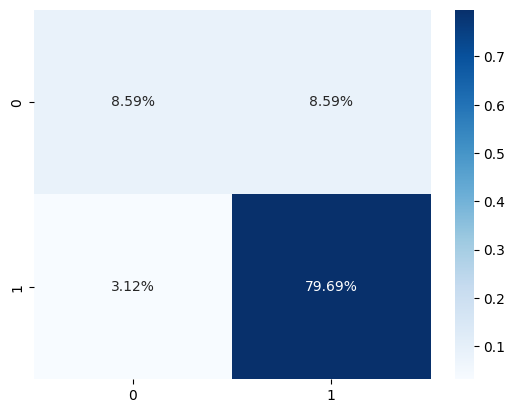

In [ ]:
# Recap the best model
X = numerical_data[feature_cols]
y = numerical_data["G3"] >= 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

model = DecisionTreeClassifier(max_depth= depth, random_state= 314).fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
pass

### Decision Trees Recap
Because of class imbalance problem I tried 2 methods:

1. Focusing on F1 score of underrepresented class.
    - I my opinion this yield the better results. The accuracy was 88% and False predictions resulted in precision of 0.73, recall of 0.50, and F1 score of 0.59.
2. Making up the difference by sampling.
    - In case of RandomOverSampler, we get 82% accuracy and in case of False predictions, we get precision of 0.48, recall of 0.81, and F1 score of 0.61.
    - With depth 6 and features: `['school', 'Fedu', 'guardian', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc']`

Note: In Paper (2008) (Table 3; Portugese; DT, Setup C) resulted in PPC (accuracy) of 84.4 % (additional metrics was not mentioned).

## Random Forests

In [27]:
from sklearn.ensemble import RandomForestClassifier
f1_false_scorer = make_scorer(f1_score, pos_label=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    "max_depth": range(3, 15),
    "n_estimators": [50, 100, 200],
    "min_samples_split": range(2, 6),
    "min_samples_leaf": range(1, 5)
}

# Create a RandomForestClassifier instance
rtc = RandomForestClassifier(random_state=314)
# Perform grid search with cross-validation
gs = GridSearchCV(rtc, param_grid, cv=5, scoring=f1_false_scorer, n_jobs=-1)
pass

In [28]:
X = numerical_data.drop(columns=y_attributes)
y = numerical_data["G3"] >= 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 6),
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=0))

In [29]:
print(gs.best_score_, gs.best_params_)

0.35983436853002065 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


              precision    recall  f1-score   support

       False       0.56      0.23      0.32        22
        True       0.86      0.96      0.91       106

    accuracy                           0.84       128
   macro avg       0.71      0.59      0.61       128
weighted avg       0.81      0.84      0.81       128



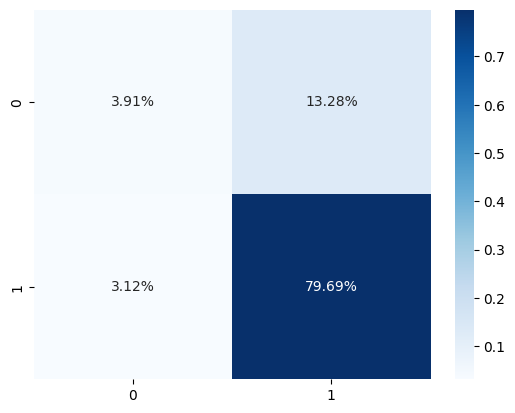

In [ ]:
pred = gs.predict(X_test)

print(classification_report(y_test, pred))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
pass

# I tried multiple methods of finding the best combination of parameters and features and none of them came close to the selected best decision tree model.

### Random Forests Recap
Again, I tried multiple methods. The best one was the one that was shown with 84% accuracy and resulted in a False predictions accuracy of 0.56, recall of 0.23 and F1 score of 0.32.

Note: In Paper (2008) (Table 3; Portugese; RF, Setup C) resulted in PPC (accuracy) of 85.0 % (additional metrics was not mentioned).

## Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    "max_depth": range(3, 10),
    "n_estimators": [50, 100, 200],
    "min_samples_split": range(2, 5),
    "min_samples_leaf": range(1, 5),
    "learning_rate": [0.1, 0.5, 1.0]
}

# Create a GradientBoostingClassifier instance
gbc = GradientBoostingClassifier(random_state=314)
# Perform grid search with cross-validation
gs = GridSearchCV(gbc, param_grid, cv=5, scoring=f1_false_scorer, n_jobs=-1)
pass

In [32]:
X = numerical_data.drop(columns=y_attributes)
y = numerical_data["G3"] >= 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=0))

In [33]:
print(gs.best_score_, gs.best_params_)

0.42251696129956995 {'learning_rate': 0.5, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


              precision    recall  f1-score   support

       False       0.42      0.45      0.43        22
        True       0.88      0.87      0.88       106

    accuracy                           0.80       128
   macro avg       0.65      0.66      0.66       128
weighted avg       0.80      0.80      0.80       128



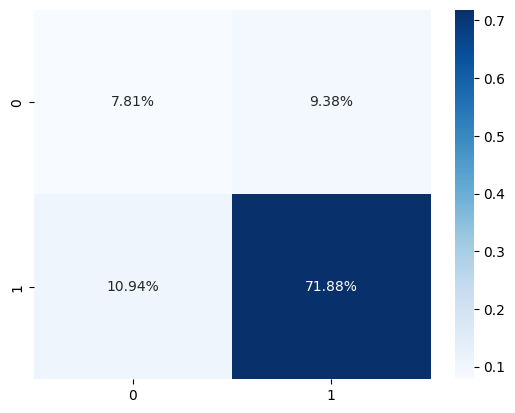

In [ ]:
pred = gs.predict(X_test)

print(classification_report(y_test, pred))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
pass

### Gradient Boosting Recap
By far the most time-consuming. This is my first time trying Gradient Boosting. I've used GridSearch for picking the paramethers. It found out best model was: 80% accuracy and resulted in a False predictions accuracy of 0.42, recall of 0.45 and F1 score of 0.43.

Note: I might try XGBoost later. 

## SVC

In [72]:
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.preprocessing import StandardScaler

f1_false_scorer = make_scorer(f1_score, pos_label=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    "kernel":("linear", "rbf", "sigmoid"), 
    "C": np.linspace(0.1, 1, 20),
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]  # Only for polynomial kernel
}

# Create a SVC instance
svm = SVC(random_state=314)
# Perform grid search with cross-validation
gs = GridSearchCV(svm, param_grid, cv=5, scoring=f1_false_scorer, n_jobs=-1)
pass

In [73]:
X = numerical_data.drop(columns=y_attributes)
y = numerical_data["G3"] >= 10

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=314), n_jobs=-1,
             param_grid={'C': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ]),
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf', 'sigmoid')},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=0))

In [74]:
print(gs.best_score_, gs.best_params_)

0.39141549525988883 {'C': np.float64(0.33684210526315794), 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


              precision    recall  f1-score   support

       False       0.53      0.41      0.46        22
        True       0.88      0.92      0.90       106

    accuracy                           0.84       128
   macro avg       0.71      0.67      0.68       128
weighted avg       0.82      0.84      0.83       128



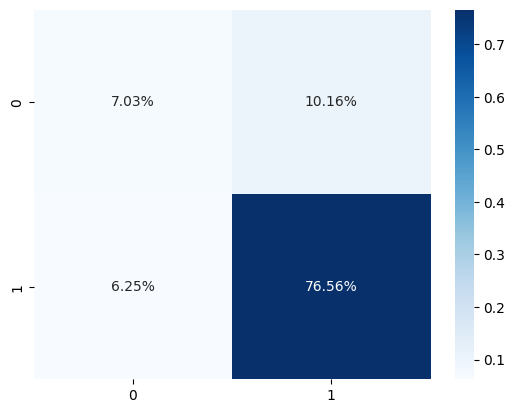

In [ ]:
pred = gs.predict(X_test)

print(classification_report(y_test, pred))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
pass

### SVC Recap
I tried to use all the attributes because of its benefits for overfitting. It ranked so far at 2nd place, right behind Decision trees. The best version had 80% accuracy and resulted in a False predictions accuracy of 0.42, recall of 0.45 and F1 score of 0.43.